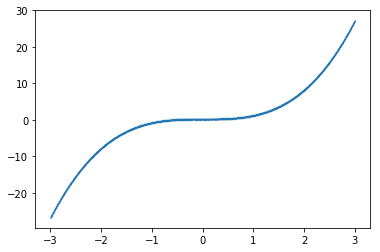

In [135]:
import torch
import matplotlib.pyplot as plt

from torch import nn,optim
import torch.nn.functional as F

#根据一元三次方程生成一批数据样本
x = torch.unsqueeze(torch.linspace(-3,3,10000),dim = 1)
y = x.pow(3) + 0.3*torch.rand(x.size())

plt.scatter(x.numpy(),y.numpy(),s = 0.01)
plt.show()

In [136]:
class Net(nn.Module):  # 继承 torch.nn 的 Module
    def __init__(self,input_feature,num_hidden,outputs):
        super(Net,self).__init__()  # 继承 __init__ 
        # 定义每层神经元的结构与数目
        self.hidden = nn.Linear(input_feature,num_hidden)   #隐含层
        self.out = nn.Linear(num_hidden,outputs)    #输出层
     #前向传播   
    def forward(self,x):
        x = F.relu(self.hidden(x))   #隐含层数据需要经过relu激活函数进行非线性处理
        x = self.out(x)
        return x


In [137]:
#检测是否支持CUDA
CUDA = torch.cuda.is_available()
if CUDA:   
    #初始化输入神经元数目为1，隐含层数目为20，输出神经元数目为1的神经网络模型
    net = Net(input_feature=1,num_hidden = 20 , outputs =1).cuda()
    inputs = x.cuda()
    target = y.cuda()
    print("GPU")
else:
    net = Net(input_feature=1,num_hidden = 20 , outputs =1)
    inputs = x
    target = y
    print("CPU")

GPU


In [138]:
def draw(output,loss):
    if CUDA:
        output = output.cpu()   #如果使用了CUDA，画图时需要把GPU数据转移到CPU
    plt.cla()
    plt.scatter(x.numpy(),y.numpy())
    plt.plot(x.numpy(),output.data.numpy(),'r-',lw=5)
    plt.text(0.5,0,'loss=%s'% (loss.item()),fontdict={'size':20,'color':'red'})
    plt.pause(0.005)

In [139]:
optimizer = optim.SGD(net.parameters(),lr = 0.01)  #优化器为随机梯度下降,传入 net 的所有参数, 学习率
criterion = nn.MSELoss()    #损失函数为均方误差,预测值和真实值的误差计算公式

In [142]:
def train(modle,criterion,optimizer,epochs):
    for epochs in range(epochs):
        output = modle(inputs)
        loss = criterion(output,target)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epochs % 5000 ==0:
            draw(output,loss)
    return modle,loss

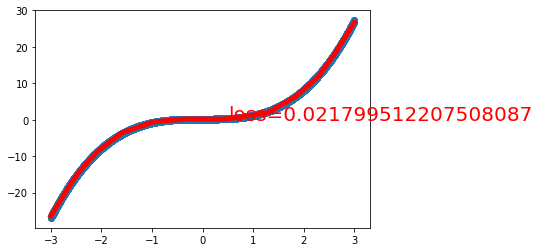

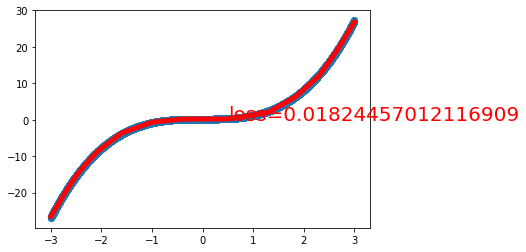

final loss: 0.01638699695467949


In [143]:
net,loss = train(net,criterion,optimizer,10000)
print("final loss:",loss.item())